# CMIP6 Historical model runs
This script opens up all the CMIP6 historical model run files with data on precipitation pr and surface temperature tas and loops over the files.


In [2]:
import xarray as xr, matplotlib.pyplot as plt
#import sys 
#sys.path.append('') # use this if the function file is in a different directory to the notebook
from importlib import reload # need to use this if I edit a function file
import anomaly_function as func # imports the function
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????

In [3]:
# use this to reload the function file if I make any edits to it
func = reload(func) 

In [4]:
# store each section of the directory as a string
institution_dir = '/g/data/lp01/CMIP6/CMIP/'
tas_dir = '/historical/r1i1p1f1/Amon/tas/gr1.5/'
pr_dir = '/historical/r1i1p1f1/Amon/pr/gr1.5/'
print(institution_dir, tas_dir, pr_dir)

/g/data/lp01/CMIP6/CMIP/ /historical/r1i1p1f1/Amon/tas/gr1.5/ /historical/r1i1p1f1/Amon/pr/gr1.5/


In [5]:
models_tas = func.read_models(institution_dir, tas_dir, '1850-01','2015-01')

45 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/tas/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tas/gr1.5/v20190919/*.nc
Model MPI-ESM1-2-HR has different time so is now removed
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/tas/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/tas/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190818/*.nc
BCC-ESM1 

In [6]:
models_pr = func.read_models(institution_dir, pr_dir, '1850-01','2015-01')

45 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/pr/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/pr/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/pr/gr1.5/v20190919/*.nc
MPI-ESM1-2-HR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/pr/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/pr/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p

In [7]:
# make sure the models are the same for both vairables
# delete the height from the models_tas array (if it hasn't been deleted already)
if 'height' in models_tas:
    del models_tas['height']
# delete models that aren't common between variables
models_tas = models_tas.where(models_tas.model.isin(models_pr.model), drop = True)
models_pr = models_pr.where(models_pr.model.isin(models_tas.model), drop = True)
#chekc that the models are the same for both variables and if so print True
models_tas.model.equals(models_pr.model)

True

In [51]:
# combine precipitation and temperature into one dataset
models = xr.Dataset({'tas': models_tas.tas, 'pr': models_pr.pr})
# change the pr units
models['pr'] = models.pr*86400
models

,Array,Chunk
Bytes,9.12 GB,228.10 MB
Shape,"(40, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,325 Tasks,40 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,18.25 GB,456.19 MB
Shape,"(40, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,365 Tasks,40 Chunks
Type,float64,numpy.ndarray


Right now I have all the models stored in one array so from hereafter I can calculate anomalies etc.  

In [52]:
# area weighting 
models_w = models*np.cos(models.lat*(np.pi/180))

In [53]:
# eruption date
e_date = ['1883-08','1902-10', '1963-03', '1982-04', '1991-06']
e_pre5yrs = ['1878-08','1897-10', '1958-03', '1977-04', '1986-06']
e_pre3mon = ['1883-05','1902-7', '1962-12', '1982-01', '1991-03']
e_post5yrs = ['1888-08','1907-10', '1968-03', '1987-04', '1996-06']

In [54]:
# select out hte 10 year time frame around each eruption (5yrs before and after)
# tas
Krakatau = models_w.sel(time = slice('1878-08','1888-08'))
SantaMaria = models_w.sel(time = slice('1897-10','1907-10'))
Agung = models_w.sel(time = slice('1958-03','1968-03'))
ElChicon = models_w.sel(time = slice('1977-04','1987-04'))
Pinatubo = models_w.sel(time = slice('1986-06','1996-06'))

In [55]:
# select out the northern and sourhern hemisphere regions
Krakatau_SH = Krakatau.sel(lat=slice(-90,0))
Krakatau_NH = Krakatau.sel(lat=slice(0,90))

SantaMaria_SH = SantaMaria.sel(lat=slice(-90,0))
SantaMaria_NH = SantaMaria.sel(lat=slice(0,90))

Agung_SH = Agung.sel(lat=slice(-90,0))
Agung_NH = Agung.sel(lat=slice(0,90))

ElChicon_SH = ElChicon.sel(lat=slice(-90,0))
ElChicon_NH = ElChicon.sel(lat=slice(0,90))

Pinatubo_SH = Pinatubo.sel(lat=slice(-90,0))
Pinatubo_NH = Pinatubo.sel(lat=slice(0,90))

In [56]:
# import land fraction data
landfrac_ds = xr.open_dataset('/home/563/kb6999/Models/landfraction_file_grid1.5.nc')
landmask = landfrac_ds.mean(dim='time')

In [57]:
# this is where I use the land mask and select out the continents
# and I select the Australia region with a lon,lat box and the Eastern Australia region
Krakatau_aus = Krakatau.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
Krakatau_EA = Krakatau.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

SantaMaria_aus = SantaMaria.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
SantaMaria_EA = SantaMaria.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

Agung_aus = Agung.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
Agung_EA = Agung.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

ElChicon_aus = ElChicon.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
ElChicon_EA = ElChicon.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

Pinatubo_aus = Pinatubo.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
Pinatubo_EA = Pinatubo.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

In [58]:
# use functions to calculate the monthly anomalies for the globe
K_mon_anom_Glob = func.monthly_anomaly(Krakatau, '1878-08', '1883-05')
S_mon_anom_Glob = func.monthly_anomaly(SantaMaria, '1897-10', '1902-07')
A_mon_anom_Glob = func.monthly_anomaly(Agung, '1958-03', '1962-12')
E_mon_anom_Glob = func.monthly_anomaly(ElChicon, '1977-04', '1982-01')
P_mon_anom_Glob = func.monthly_anomaly(Pinatubo, '1986-06', '1991-03')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

In [59]:
# # use functions to calculate the monthly anomalies for the SH
# K_mon_anom_SH = func.monthly_anomaly(Krakatau_SH, '1878-08', '1883-05')
# S_mon_anom_SH = func.monthly_anomaly(SantaMaria_SH, '1897-10', '1902-07')
# A_mon_anom_SH = func.monthly_anomaly(Agung_SH, '1958-03', '1962-12')
# E_mon_anom_SH = func.monthly_anomaly(ElChicon_SH, '1977-04', '1982-01')
# P_mon_anom_SH = func.monthly_anomaly(Pinatubo_SH, '1986-06', '1991-03')

In [60]:
# # use functions to calculate the monthly anomalies for the globe
# K_mon_anom_ = func.monthly_anomaly(Krakatau_SH, '1878-08', '1883-05')
# S_mon_anom_ = func.monthly_anomaly(SantaMaria_SH, '1897-10', '1902-07')
# A_mon_anom_ = func.monthly_anomaly(Agung_SH, '1958-03', '1962-12')
# E_mon_anom_ = func.monthly_anomaly(ElChicon_SH, '1977-04', '1982-01')
# P_mon_anom_ = func.monthly_anomaly(Pinatubo_SH, '1986-06', '1991-03')

In [61]:
K_mon_anom_Glob

,Array,Chunk
Bytes,1.12 GB,230.40 kB
Shape,"(40, 121, 120, 240)","(1, 1, 120, 240)"
Count,19806 Tasks,4840 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,1.12 GB,230.40 kB
Shape,"(40, 121, 120, 240)","(1, 1, 120, 240)"
Count,19846 Tasks,4840 Chunks
Type,float64,numpy.ndarray


In [62]:
# reset all the times so 0 corresponds to the eruption year and month
times = np.arange(-60,61)
# use functions to calculate the seasonal anomalies for the globe
K_mon_anom_Glob['time'] = times
S_mon_anom_Glob['time'] = times
A_mon_anom_Glob['time'] = times
E_mon_anom_Glob['time'] = times 
P_mon_anom_Glob['time'] = times

In [71]:
# delete the months dimension (but not the time)
if 'month' in P_mon_anom_Glob:
    del K_mon_anom_Glob['month']
    del S_mon_anom_Glob['month']
    del A_mon_anom_Glob['month']
    del E_mon_anom_Glob['month']
    del P_mon_anom_Glob['month']

In [73]:
# select out the 10 year time frame around each eruption, (5yrs before and after)
# then combine all eruptions into a single array
#tas
volcanoes = ['Krakatau', 'Santa Maria','Agung','El Chichon', 'Pinatubo']
ds=[]
ds.append(K_mon_anom_Glob)
ds.append(S_mon_anom_Glob)
ds.append(A_mon_anom_Glob)
ds.append(E_mon_anom_Glob)
ds.append(P_mon_anom_Glob)

# store all eruptions in an array
composite_mon_Glob = xr.concat(ds, dim='volcano', coords = 'minimal')
composite_mon_Glob.coords['volcano'] = volcanoes

In [25]:
# take the mean in lat and lon for monthly anomalies
composite_mean_Glob = composite_mon_Glob.mean(dim=('lat','lon'))

In [26]:
# calculate the monthly model mean for monthly anomalies
composite_mmm_Glob = composite_mean_Glob.mean(dim='model')

In [27]:
composite_mmm_Glob

,Array,Chunk
Bytes,4.84 kB,8 B
Shape,"(5, 121)","(1, 1)"
Count,227036 Tasks,605 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,4.84 kB,8 B
Shape,"(5, 121)","(1, 1)"
Count,227036 Tasks,605 Chunks
Type,float64,numpy.ndarray


In [35]:
# take the composite over all volcanoes
V_composite_mmm_Glob = composite_mmm_Glob.mean(dim='volcano')

In [36]:
V_composite_mmm_Glob


,Array,Chunk
Bytes,968 B,8 B
Shape,"(121,)","(1,)"
Count,228004 Tasks,121 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,968 B,8 B
Shape,"(121,)","(1,)"
Count,228004 Tasks,121 Chunks
Type,float64,numpy.ndarray


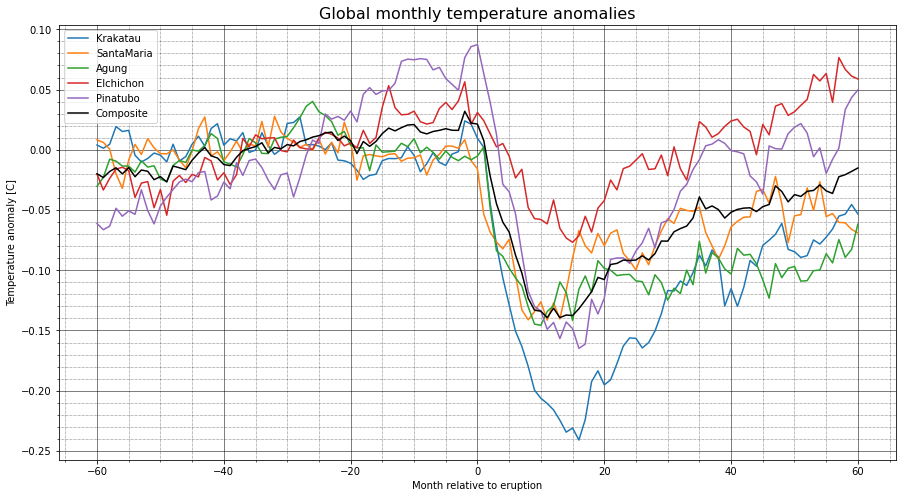

In [45]:
fig, ax = plt.subplots() # make a figure

i=0
# loop over all eruptions and plot the seasonal anomalies on one graph
for v in composite_mmm_Glob.volcano:
    composite_mmm_Glob.sel(volcano=v).tas.plot(ax=ax, label = f'{volcanoes[i]}') # plot the anomalies
    i=i+1

V_composite_mmm_Glob.tas.plot(color = 'k', ax=ax, label = 'Composite') 
plt.title('Global monthly temperature anomalies', fontsize=16)
plt.ylabel('Temperature anomaly [C]') # this overrides the label which comes on automatically using the xarray title
plt.xlabel('Month relative to eruption') # this overrides the label which comes on automatically using the xarray title

ax.legend(loc="upper left")
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax.minorticks_on() # need this line in order to get the minor grid lines 
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig.set_figheight(8) # these two parameters change the figure height and width 
fig.set_figwidth(15)

plt.savefig('composite_mon_tas_glob.png', dpi=300, quality=80, optimize=True, progressive=True)

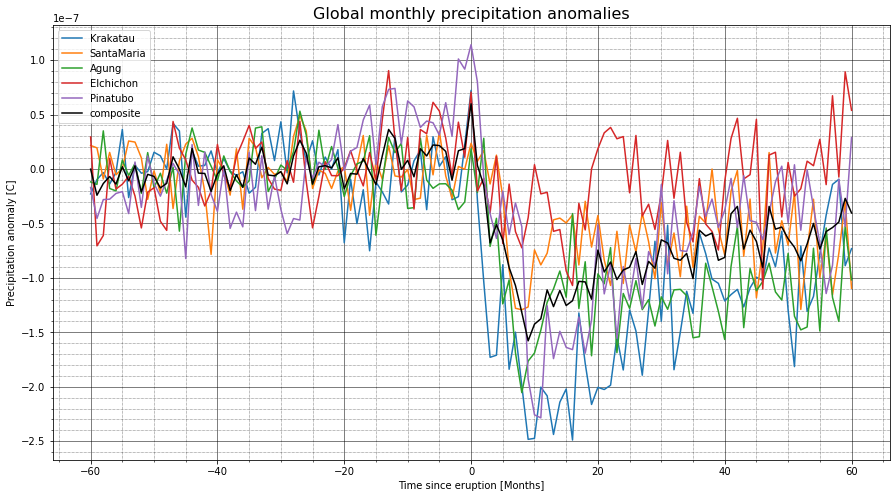

In [43]:
fig, ax = plt.subplots() # make a figure

i=0;
# loop over all eruptions and plot the seasonal anomalies on one graph
for v in composite_mmm_Glob.volcano:
    composite_mmm_Glob.sel(volcano=v).pr.plot(ax=ax, label = volcanoes[i]) # plot the anomalies
    i=i+1

V_composite_mmm_Glob.pr.plot(color = 'k', ax=ax, label = 'Composite') 
plt.title('Global monthly precipitation anomalies', fontsize=16)
plt.ylabel('Precipitation anomaly [C]') # this overrides the label which comes on automatically using the xarray title
plt.xlabel('Month relative to eruption') # this overrides the label which comes on automatically using the xarray title

ax.legend(loc="upper left")
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax.minorticks_on() # need this line in order to get the minor grid lines 
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig.set_figheight(8) # these two parameters change the figure height and width 
fig.set_figwidth(15)

plt.savefig('composite_mon_pr_glob.png', dpi=300, quality=80, optimize=True, progressive=True)